In [9]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np 
from astropy.io import fits
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord
from astropy import units as u

import plotly
import plotly.graph_objs as go

In [2]:
act_clus_path = 'Data/DR5_cluster-catalog_v1.0b3.fits'
table_act_clus = Table.read(act_clus_path )

df_act_clus = table_act_clus.to_pandas()

df_act_clus.columns

Index(['name', 'RADeg', 'decDeg', 'SNR', 'y_c', 'err_y_c', 'fixed_SNR',
       'fixed_y_c', 'fixed_err_y_c', 'template', 'tileName', 'redshift',
       'redshiftErr', 'redshiftType', 'redshiftSource', 'M500', 'M500_errPlus',
       'M500_errMinus', 'M500Cal', 'M500Cal_errPlus', 'M500Cal_errMinus',
       'M200m', 'M200m_errPlus', 'M200m_errMinus', 'M500Uncorr',
       'M500Uncorr_errPlus', 'M500Uncorr_errMinus', 'M200mUncorr',
       'M200mUncorr_errPlus', 'M200mUncorr_errMinus', 'footprint_DESY3',
       'footprint_HSCs19a', 'footprint_KiDSDR4', 'zCluster_delta',
       'zCluster_errDelta', 'zCluster_source', 'RM', 'RM_LAMBDA',
       'RM_LAMBDA_ERR', 'RMDESY3', 'RMDESY3_LAMBDA_CHISQ',
       'RMDESY3_LAMBDA_CHISQ_E', 'CAMIRA', 'CAMIRA_N_mem', 'opt_RADeg',
       'opt_decDeg', 'opt_positionSource', 'notes', 'knownLens',
       'knownLensRefCode', 'warnings'],
      dtype='object')

In [3]:
df_act_clus.describe()

,RADeg,decDeg,SNR,y_c,err_y_c,fixed_SNR,fixed_y_c,fixed_err_y_c,redshift,redshiftErr,...,M200mUncorr_errMinus,zCluster_delta,zCluster_errDelta,RM_LAMBDA,RM_LAMBDA_ERR,RMDESY3_LAMBDA_CHISQ,RMDESY3_LAMBDA_CHISQ_E,CAMIRA_N_mem,opt_RADeg,opt_decDeg
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,...,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,6.369942,0.949193,0.156436,6.148885,0.821111,0.135208,0.550965,0.011850,...,0.980084,-5.965902,-10.373440,-59.459191,-73.821786,-33.774595,-57.025730,-91.902926,140.961503,-14.515883
std,117.664528,24.306970,3.330914,0.667858,0.094686,3.290689,0.466707,0.036248,0.260175,0.014221,...,0.411524,32.667656,30.993106,72.546321,45.225033,81.888127,51.560543,31.202135,125.149443,29.641844
min,0.020896,-59.987040,4.018115,0.219650,0.050682,2.839576,0.278828,0.073262,0.035200,0.000000,...,0.455283,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,39.386235,-34.828811,4.562541,0.512456,0.092645,4.358696,0.548591,0.103023,0.354170,0.000000,...,0.745857,2.534181,0.260000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,35.014455,-37.065237
50%,144.342767,-2.252158,5.266181,0.763703,0.120747,5.109624,0.706092,0.132314,0.519816,0.008756,...,0.897895,4.378976,0.400000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,137.217258,-2.467603
75%,232.604297,8.957936,6.849921,1.212606,0.187983,6.635984,0.936574,0.163962,0.709455,0.022036,...,1.088242,6.724259,0.540000,-99.000000,-99.000000,50.658356,3.650176,-99.000000,228.444725,8.883055
max,359.988280,20.486048,54.337394,13.758792,0.590781,53.994840,5.965801,0.248546,1.910000,0.210000,...,6.916736,24.080538,3.240000,299.459351,31.172960,247.195816,178.029175,117.669000,359.993443,20.487511


In [4]:
hdul = fits.open(act_clus_path)
# hdul[1].header
hdul[1].header['TTYPE16']

'M500'

In [5]:
df_act_clus_small = df_act_clus[['RADeg', 'decDeg', 'redshift', 'M500']].copy()
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500
count,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147
std,117.664528,24.306970,0.260175,1.092935
min,0.020896,-59.987040,0.035200,1.042072
25%,39.386235,-34.828811,0.354170,1.961358
50%,144.342767,-2.252158,0.519816,2.361268
75%,232.604297,8.957936,0.709455,2.937229
max,359.988280,20.486048,1.910000,13.442958


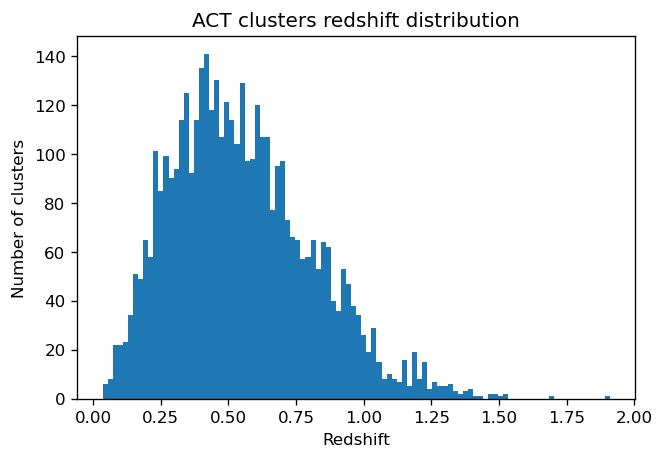

In [6]:
dpi = 120

plt.figure(dpi = dpi)
plt.hist(df_act_clus_small['redshift'], bins = 100);
plt.xlabel('Redshift')
plt.ylabel('Number of clusters')
plt.title('ACT clusters redshift distribution');

**27 Aug 2021**   
A: Since galaxy mass cut comes from CMASS (I think it's incorrect), use only CMASS galaxies. Low z clusters are a problem with CMB. CMB is interferring more with cluster's large.. or maybe try different redshifts including lowz later on. It's okay if we loose clusters.

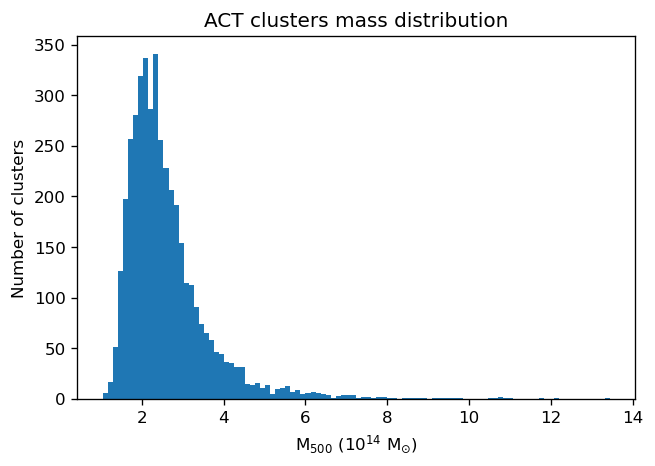

In [7]:
dpi = 120

plt.figure(dpi = dpi)
plt.hist(df_act_clus_small['M500'], bins = 100);
plt.xlabel('M$_{500}$ (10$^{14}$ M$_{\odot}$)')
plt.ylabel('Number of clusters')
plt.title('ACT clusters mass distribution');
# plt.xscale('log')

In [10]:
from astropy.cosmology import Planck18 as cosmo

# This astropy function will give us a distance in Mpc
df_act_clus_small['r_comov[Mpc/h]'] = cosmo.comoving_distance(df_act_clus_small['redshift']).value / cosmo.h;
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h]
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,3030.791002
std,117.664528,24.306970,0.260175,1.092935,1210.984726
min,0.020896,-59.987040,0.035200,1.042072,228.608662
25%,39.386235,-34.828811,0.354170,1.961358,2120.021116
50%,144.342767,-2.252158,0.519816,2.361268,2974.576250
75%,232.604297,8.957936,0.709455,2.937229,3853.453854
max,359.988280,20.486048,1.910000,13.442958,7645.791379


In [11]:
c = SkyCoord(ra = df_act_clus_small['RADeg'] * u.degree, 
             dec = df_act_clus_small['decDeg'] * u.degree, 
             distance = df_act_clus_small['r_comov[Mpc/h]'] )

df_act_clus_small['x_comov[Mpc/h]'] = c.cartesian.x.value
df_act_clus_small['y_comov[Mpc/h]'] = c.cartesian.y.value
df_act_clus_small['z_comov[Mpc/h]'] = c.cartesian.z.value

df_act_clus_small.head()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
0,0.020896,-38.626729,0.300599,1.683921,1825.260116,1425.946665,0.520058,-1139.407886
1,0.061318,-43.955645,0.878131,2.437253,4554.508919,3278.685902,3.508881,-3161.290549
2,0.089905,-28.091255,0.282570,2.700574,1723.993853,1520.903339,2.386502,-811.789470
3,0.113536,-1.044805,0.438800,1.493793,2567.184731,2566.752876,5.086245,-46.810749
4,0.113978,-5.880626,0.201735,1.623578,1257.042246,1250.424611,2.487471,-128.791742


In [12]:
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,3030.791002,471.456800,324.588298,-565.562838
std,117.664528,24.306970,0.260175,1.092935,1210.984726,2364.292580,1635.569100,1319.756732
min,0.020896,-59.987040,0.035200,1.042072,228.608662,-6163.229233,-5208.507048,-5650.519796
25%,39.386235,-34.828811,0.354170,1.961358,2120.021116,-1613.598656,-775.581220,-1455.432920
50%,144.342767,-2.252158,0.519816,2.361268,2974.576250,1069.530532,384.114036,-99.930771
75%,232.604297,8.957936,0.709455,2.937229,3853.453854,2242.835822,1467.460902,367.275769
max,359.988280,20.486048,1.910000,13.442958,7645.791379,6535.053581,5109.411777,2019.742158


In [13]:
df_act_clus_small.to_csv('Data/ACT_DR5_Clusters_Comov.csv')

In [24]:
df_act_clus_small_z_gr_4 = df_act_clus_small[df_act_clus_small['redshift'] > 0.4]
df_act_clus_small_z_gr_4.to_csv('Data/ACT_DR5_Clusters_Comov_z_gt_4.csv')
df_act_clus_small_z_gr_4.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000
mean,147.264727,-12.067724,0.675748,2.600794,3646.333611,563.146877,412.522384,-695.891857
std,116.666014,24.799095,0.212129,0.967247,897.160904,2714.330380,1865.511322,1511.825347
min,0.061318,-59.987040,0.400000,1.282935,2364.955329,-6163.229233,-5208.507048,-5650.519796
25%,38.284224,-36.322144,0.508558,1.994725,2919.147812,-2235.750736,-992.923834,-1980.051681
50%,137.877569,-2.353657,0.630663,2.377583,3500.568749,1612.300131,592.847691,-133.334006
75%,228.111848,9.210821,0.805250,2.924113,4260.341987,2673.833980,1865.356675,529.055266
max,359.988280,20.232137,1.910000,12.165655,7645.791379,6535.053581,5109.411777,2019.742158


In [23]:
df_act_clus_small_z_gr_4_lt_7 = df_act_clus_small[(df_act_clus_small['redshift'] > 0.4) &
                                             (df_act_clus_small['redshift'] < 0.7)]
df_act_clus_small_z_gr_4_lt_7.to_csv('Data/ACT_DR5_Clusters_Comov_z_gt_4_lt_7.csv')
df_act_clus_small_z_gr_4_lt_7.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000
mean,151.117909,-10.484750,0.539646,2.655725,3060.413094,389.404854,234.893108,-488.893250
std,115.964071,24.318289,0.086152,1.019516,416.941322,2263.239200,1593.098992,1199.550809
min,0.113536,-59.987040,0.400000,1.327872,2364.955329,-3802.974439,-3490.454261,-3165.928912
25%,39.190563,-33.771161,0.461421,2.007470,2682.940846,-2115.068178,-1058.332527,-1625.693012
50%,148.266419,-1.220526,0.539182,2.428041,3069.046736,1343.811173,461.920482,-67.109076
75%,230.754830,9.823903,0.612267,2.977957,3415.714150,2321.346714,1529.907283,517.166587
max,359.988280,20.232137,0.699912,12.165655,3811.609493,3759.638002,3451.436108,1236.427091


In [19]:
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

# df_north_pos_z_sample = df_north_pos_z.sample(n = no_gal_show, replace = False, 
#                                                random_state = 0)  

ax.scatter(df_act_clus_small['x_comov[Mpc/h]'], 
           df_act_clus_small['y_comov[Mpc/h]'], 
           df_act_clus_small['z_comov[Mpc/h]'],
           s = 0.2, alpha = 0.8);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -4500, 4500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

plt.title('Distribution of ACT clusters')

plt.show()

Using matplotlib backend: Qt5Agg


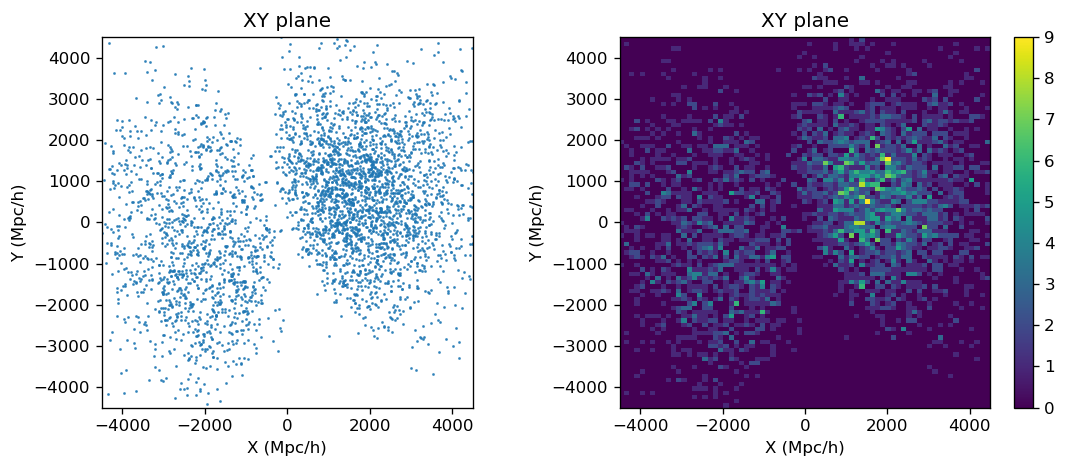

In [16]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['x_comov[Mpc/h]'], 
            df_act_clus_small['y_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['x_comov[Mpc/h]'], 
           df_act_clus_small['y_comov[Mpc/h]'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

**26 Aug 2021**  
A: This (ACT) is the largest catalog one has right now. It is really impressive cluster catalog.

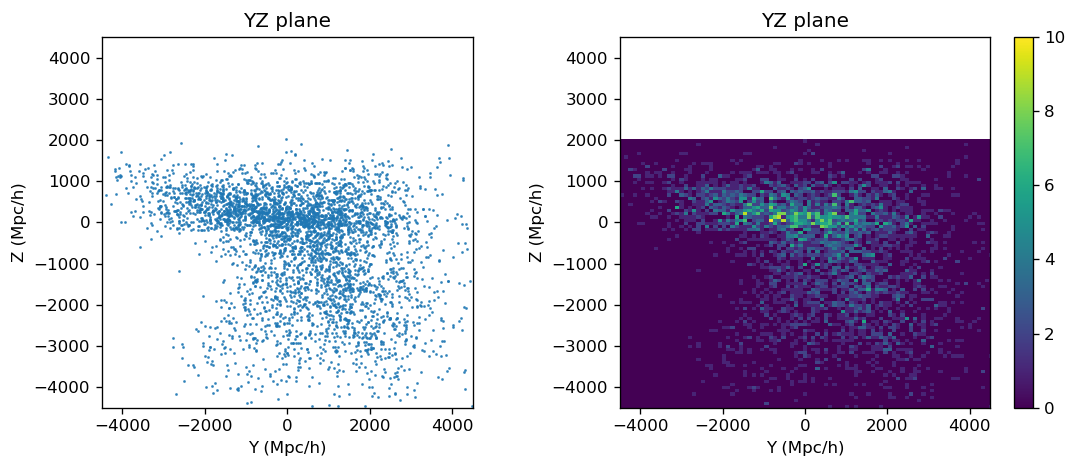

In [17]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['y_comov[Mpc/h]'], 
            df_act_clus_small['z_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['y_comov[Mpc/h]'], 
           df_act_clus_small['z_comov[Mpc/h]'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

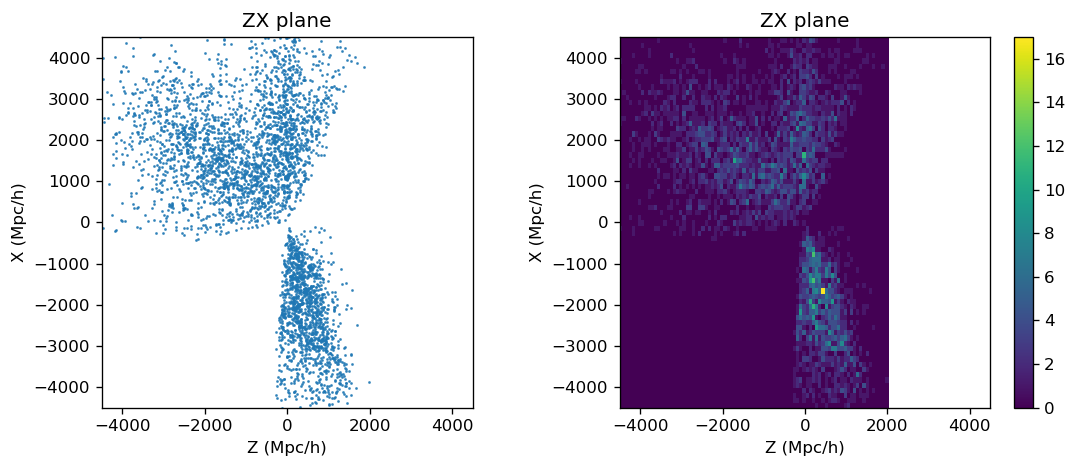

In [18]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['z_comov[Mpc/h]'], 
            df_act_clus_small['x_comov[Mpc/h]'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['z_comov[Mpc/h]'], 
           df_act_clus_small['x_comov[Mpc/h]'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();